In [1]:
###データセットの準備

from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(iris_df.head()) #データの確認

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


iris = load_iris()
iris_target_data = pd.DataFrame(iris.target, columns=['Species'])
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

X_train, X_test, Y_train, Y_test = train_test_split(iris_df, iris_target_data)
print(iris_df)
print(iris_target_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     Species
0          0
1          0
2

ここでk-nnのモデル定義

In [3]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)

<ipython-input-3-a6a3bea81454>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=6)

n_neighborsにより、近傍として取り扱うデータの数を指定する。
今回は、近傍の6個のデータに対して多数決。

In [4]:
#精度の評価
Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

0.9473684210526315


predictにより、引数に渡したデータをもとに目的変数を予測します。また、metrics.accuracy_scoreによりY_testとY_pred)の一致率を算出しています。

92.1パーセントとなかなかの精度で予測することができました。

次のコードで、近傍とするデータの数を変更していき、精度がどれくらいに変化するかを図示していきます。

<ipython-input-5-085e6fc156aa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, Y_train)
<ipython-input-5-085e6fc156aa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, Y_train)
<ipython-input-5-085e6fc156aa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, Y_train)
<ipython-input-5-085e6fc156aa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, Y_train)
<ipython-input-5-085e6fc156aa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

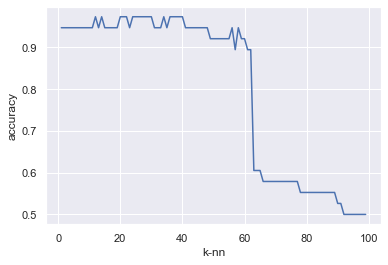

In [5]:
accuracy_list = []
sns.set()
k_range = range(1, 100)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(Y_test, Y_pred))

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, accuracy_list)
ax.set_xlabel('k-nn')
ax.set_ylabel('accuracy')
plt.show()

上図をみると、kが60を超えたあたりで急激に精度が落ちています。
これは、もともとアヤメのデータセットには一つの種類のデータが50個しかないためであり、一定以上のn_neighborsにおいては精度が落ちるのは当然といえます。